## Portfolio optimization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
  
    
def normalize_data(df): 
    return df/ df.ix[0,:]
 
    
def function(allocation_guess, df):
    
    trading_days = 252
    starting_value = 1000000 # $1,000,000
    
    df_normalized = normalize_data(df) # Normalize stock prices
    df_normalized_allocation = df_normalized * allocation_guess # apply allocations to normalized data
    
    # Calculate portfolio value by day
    starting_value = [1000000] # starting value of portfolio is $1,000,000
    df_normed_allocation_X_starting_value = df_normalized_allocation * starting_value # normalize portfolio
    daily_portfolio_values = df_normed_allocation_X_starting_value.sum(axis=1)  # portfolio value by day
    
    # Compute daily returns
    daily_returns = (daily_portfolio_values/daily_portfolio_values.shift(1)) - 1
    daily_returns.ix[0] = 0
    daily_returns_portfolio = daily_returns
    daily_returns_portfolio = daily_returns_portfolio[1:] # Remove first row "0" for portfolio calculations

    # Calculate negative sharpe ratio to find optimal portfolio allocation
    negative_sharpe_ratio = -1 * np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    return negative_sharpe_ratio


def optimize_portfolio_allocation():
    
    dates = pd.date_range('2011-12-18', '2016-12-18') # Define a date range
    symbols = ['SPY', 'AMZN', 'FB', 'AXY', 'AAPL'] # Choose stock symbols to read
    df = get_data(symbols, dates) # Get stock data
    df.fillna(method="ffill", inplace="True") # Forward fill empty trade dates (for AXY)
    df.fillna(method="bfill", inplace="True") # backfill empty trade dates (for AXY)
    
    # find allocations for optimal portfolio
    allocation_guess = [0.2, 0.2, 0.2, 0.2, 0.2]
    bounds = [(0,1.0) for i in range(len(symbols))]
    # bounds = tuple((0,1.0) for x in range(len(symbols)))
    
    optimized_allocation = spo.minimize(function, allocation_guess, args=(df,), bounds=bounds, method='SLSQP', 
                           options={'disp':True}, 
                            constraints=({ 'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})).x
    
    print "\n"
    print "optimized allocation - raw format: "
    print optimized_allocation
    print "\n"
    print "optimized allocation:"
    print ("SPY: {0:.4f}".format(round(optimized_allocation[0],2)))
    print ("AMZN: {0:.4f}".format(round(optimized_allocation[1],2)))
    print ("FB: {0:.4f}".format(round(optimized_allocation[2],2)))
    print ("AXY: {0:.4f}".format(round(optimized_allocation[3],2)))
    print ("AAPL: {0:.4f}".format(round(optimized_allocation[4],2)))
    
      
if __name__ == "__main__":
    optimize_portfolio_allocation()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.31685179147
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


optimized allocation - raw format: 
[  7.20305376e-01   1.59730875e-01   8.43378689e-02   1.19804340e-17
   3.56258801e-02]


optimized allocation:
SPY: 0.7200
AMZN: 0.1600
FB: 0.0800
AXY: 0.0000
AAPL: 0.0400




Fund allocation for ['SPY', 'AMZN', 'FB', 'AXY', 'AAPL'] [0.67, 0.15, 0.17, 0.0, 0.1]




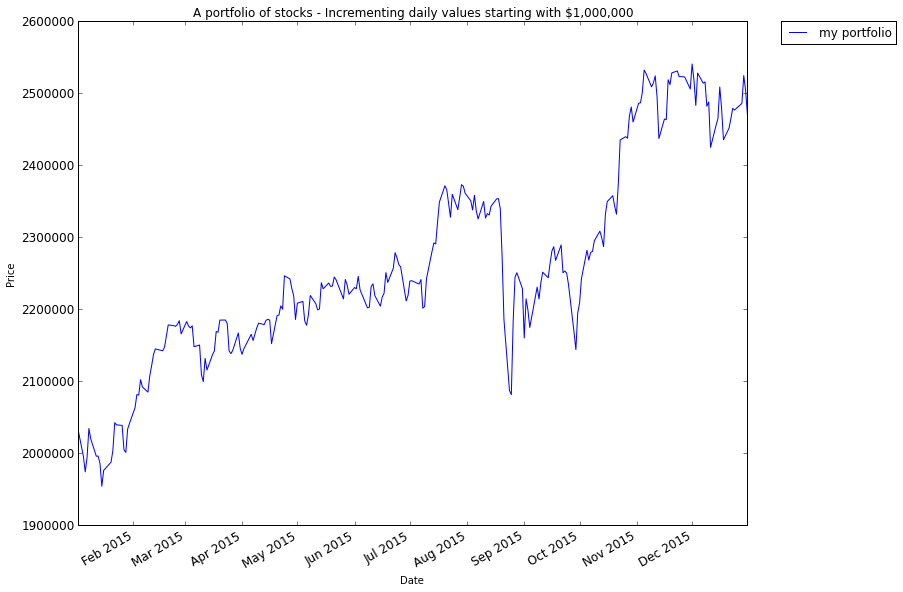

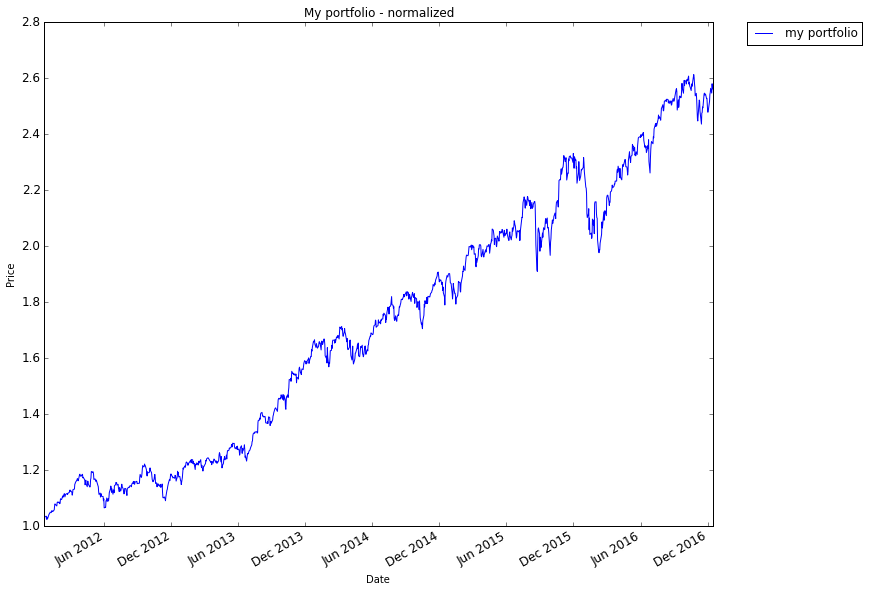

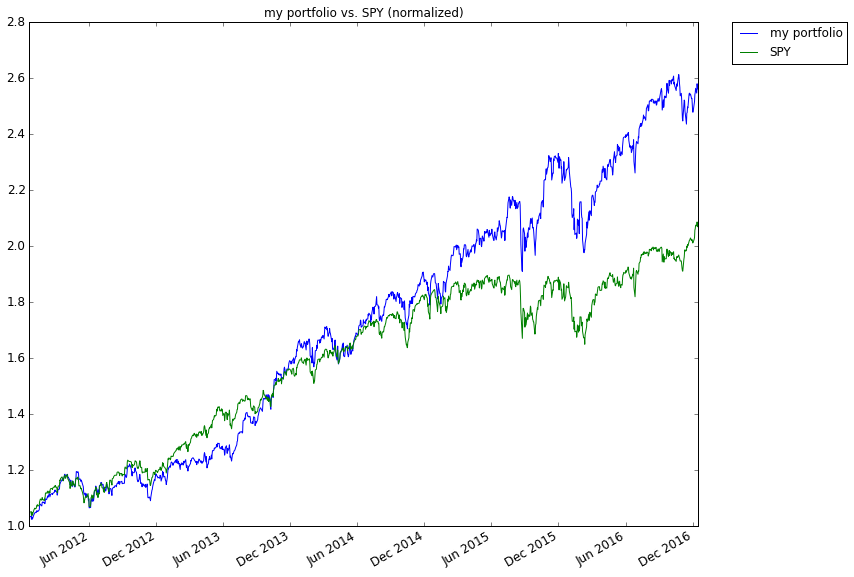

Fund allocation for ['SPY', 'AMZN', 'FB', 'AXY', 'AAPL'] [0.67, 0.15, 0.17, 0.0, 0.1]
Cumulative return:  1.5590924921
Average daily return:  0.000794780281044
Daily standard deviation:  0.00969382151977
Sharpe ratio:  1.30152446048


result: 
                 SPY      AMZN  FB       AXY      AAPL  my_portfolio
2011-12-20  0.030260  0.017788   0  0.057143  0.035949      0.024346
2011-12-21  0.001937 -0.044762   0  0.027027  0.001263     -0.004806
2011-12-22  0.008859  0.026843   0  0.000000  0.005297      0.009531
2011-12-23  0.008941 -0.009775   0  0.078947  0.011993      0.005371
2011-12-27  0.000791 -0.005697   0  0.000000  0.007934      0.000487


beta_my_portfolio=  1.03792701936 (Tells you how much more reactive it is to the market than the comparing stock.)
alpha_my_portfolio=  0.00015813870778 (Denotes how well it performs with respect to the comparing stock.)


/Users/carldgosselin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


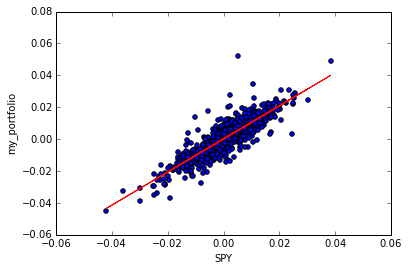

In [3]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
  
    
def compute_daily_returns_all(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    
    return daily_returns
   
    
def normalize_data(df):
    return df/ df.ix[0,:]
    
    
def compute_daily_returns_portfolio(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0] = 0
    
    return daily_returns
 
    
# def function(allocs, prices, start_val = 1000000, rfr = 0.0, sf = 252.0):
def function(optimal_allocation, df):
    
    trading_days = 252
    # Sharpe_ratio = np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    sharpe_ratio = 1.54262040364
    sharpe_ratio = sharpe_ratio * -1
    
    return sharpe_ratio

    
def run_portfolio_stats():
    
    dates = pd.date_range('2011-12-18', '2016-12-18') # Define a date range
    symbols = ['SPY', 'AMZN', 'FB', 'AXY', 'AAPL'] # Choose stock symbols to read
    df = get_data(symbols, dates) # Get stock data
    df.fillna(method="ffill", inplace="True") # Forward fill empty trade dates (for AXY)
    df.fillna(method="bfill", inplace="True") # backfill empty trade dates (for AXY)
    
    # Compute daily returns
    daily_returns_all = compute_daily_returns_all(df)
    daily_returns_all = daily_returns_all[1:] # Remove first row "0"
    
    
    df_normalized = normalize_data(df) # Normalize stock prices
    # allocation = [0.0,0.8,0.0,0.2,0.0] # starting allocation
    allocation = [0.67,0.15,0.17,0.0,0.1] # starting allocation
    df_normalized_allocation = df_normalized * allocation # normalize
    
    # Reflect starting values for each stock
    starting_value = [1000000] # starting value of portfolio is $1,000,000
    df_normed_allocation_X_starting_value = df_normalized_allocation * starting_value # normalize portfolio
    daily_portfolio_values = df_normed_allocation_X_starting_value.sum(axis=1) # Calculate portfolio value by day
    
    # Plot portfolio values
    print "\n"
    print "Fund allocation for", symbols, allocation
    print "\n"
    ax = daily_portfolio_values.ix['2015-01-01':'2016-01-01'].plot(title="A portfolio of stocks - Incrementing daily values starting with $1,000,000",fontsize=12,figsize=(12,10), label="my portfolio")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    
    portfolio_values_normalized = normalize_data(daily_portfolio_values) # Plot portfolio values - normalized
    
    # plot normalized data
    portfolio_values_normalized.ix['2015-01-01':'2016-01-01']
    ax = portfolio_values_normalized.plot(title="My portfolio - normalized",fontsize=12,figsize=(12,10), label="my portfolio")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    # Plot "my portfolio" vs SPY
    portfolio_values_normalized.plot(title="my portfolio vs. SPY (normalized)",fontsize=12,figsize=(12,10), label="my portfolio")
    df_normalized['SPY'].plot(title="my portfolio vs. SPY (normalized)",fontsize=12,figsize=(12,10), label="SPY")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    print "Fund allocation for", symbols, allocation
    daily_returns_portfolio = compute_daily_returns_portfolio(daily_portfolio_values) # Compute daily returns
    daily_returns_portfolio = daily_returns_portfolio[1:] # Remove first row "0" for portfolio calculations
    print "Cumulative return: ", (daily_portfolio_values[-1] / daily_portfolio_values[0]) - 1
    print "Average daily return: ", daily_returns_portfolio.mean()
    print "Daily standard deviation: ", daily_returns_portfolio.std()
    
    # Sharpe ratio
    trading_days = 252
    Sharpe_ratio = np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    print "Sharpe ratio: ", Sharpe_ratio
    print "\n"
    
    ###############################################
    
    #daily_returns_portfolio.columns = ['my_portfolio']
    daily_returns_all_appended = pd.concat([daily_returns_all, daily_returns_portfolio], axis=1)
    daily_returns_all_appended.rename(columns={0:"my_portfolio"}, inplace=True)
    
    print "result: "
    print daily_returns_all_appended.head()
    print "\n"
    
    # Scatterplot - CAPM between My Portfolio and SPY
    # daily_returns_portfolio.plot(kind='scatter', x='SPY', y='my_portfolio')
    daily_returns_all_appended.plot(kind='scatter', x='SPY', y='my_portfolio')
    
    beta_my_portfolio, alpha_my_portfolio =np.polyfit(daily_returns_all_appended['SPY'], daily_returns_all_appended['my_portfolio'],1)
    print "beta_my_portfolio= ", beta_my_portfolio, "(Tells you how much more reactive it is to the market than the comparing stock.)"
    print "alpha_my_portfolio= ", alpha_my_portfolio, "(Denotes how well it performs with respect to the comparing stock.)"
    # plt.figure(figsize=(12,10))
    plt.plot(daily_returns_all_appended['SPY'], beta_my_portfolio*daily_returns_all_appended['SPY'] + alpha_my_portfolio, '-', color='r')
    plt.show()
    print "\n"
    
if __name__ == "__main__":
    run_portfolio_stats()